In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

athlete_event_data = "athlete_events.csv"
athlete_data_df = pd.read_csv(athlete_event_data)
athlete_data_filtered = athlete_data_df[['Team','Year', 'Event','Medal']]

# Filter results to only include results for medalists
medalist_athlete_data = athlete_data_filtered.dropna()
# Filter to include men's marathon medalists
medalist_marathon_data_men = medalist_athlete_data.loc[medalist_athlete_data['Event'].isin(["Athletics Men's Marathon"])]
filtered_marathon_data_men = medalist_marathon_data_men.loc[medalist_marathon_data_men['Team'].isin(['East Germany', 'Ethiopia',
                                                                                                     'Germany', 'Great Britain', 'Japan', 
                                                                                                     'Kenya','United States'])]

filtered_marathon_data_men['Team'] = filtered_marathon_data_men['Team'].replace(
{'East Germany' : 'Germany'})

olympic_medalists_men = pd.DataFrame(filtered_marathon_data_men)
olympic_medalists_men.to_csv('olympic_medalists_men.csv')

# Filter results to include women's marathon medalists
medalist_marathon_data_women = medalist_athlete_data.loc[medalist_athlete_data['Event'].isin(["Athletics Women's Marathon"])]
filtered_marathon_data_women = medalist_marathon_data_women.loc[medalist_marathon_data_women['Team'].isin(['East Germany', 'Ethiopia',
                                                                                                     'Germany', 'Great Britain', 'Japan', 
                                                                                                     'Kenya','United States'])]
filtered_marathon_data_women['Team'] = filtered_marathon_data_women['Team'].replace(
{'East Germany' : 'Germany'})
olympic_medalists_women = pd.DataFrame(filtered_marathon_data_women)
olympic_medalists_women.to_csv('olympic_medalists_women.csv')
olympic_medalists_women

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Team,Year,Event,Medal
9211,Japan,1992,Athletics Women's Marathon,Silver
9212,Japan,1996,Athletics Women's Marathon,Bronze
19260,United States,1984,Athletics Women's Marathon,Gold
39682,Kenya,2000,Athletics Women's Marathon,Bronze
55201,Ethiopia,2016,Athletics Women's Marathon,Bronze
57714,Germany,1988,Athletics Women's Marathon,Bronze
58799,United States,2004,Athletics Women's Marathon,Bronze
77621,Ethiopia,2012,Athletics Women's Marathon,Gold
108032,Kenya,2012,Athletics Women's Marathon,Silver
168955,Kenya,2004,Athletics Women's Marathon,Silver


In [19]:
olympic_team_men = olympic_medalists_men.set_index('Team').sort_index(ascending=True)

gold_medals = olympic_team_men[(olympic_team_men['Medal'] == 'Gold')]
silver_medals = olympic_team_men[(olympic_team_men['Medal'] == 'Silver')]
bronze_medals = olympic_team_men[(olympic_team_men['Medal'] == 'Bronze')]

gold_medals_country = gold_medals.groupby(['Team']).count()['Medal']
silver_medals_country = silver_medals.groupby(['Team']).count()['Medal']
bronze_medals_country = bronze_medals.groupby(['Team']).count()['Medal']

total_medals_country = olympic_medalists_men.groupby(['Team']).count()['Medal']

medals_per_country = pd.DataFrame({"Gold":gold_medals_country,
                                "Silver":silver_medals_country,
                                "Bronze":bronze_medals_country,
                                "Total Medals":total_medals_country
                               })
medals_per_country

,Gold,Silver,Bronze,Total Medals
Ethiopia,4.0,1.0,3,8
Germany,2.0,NaN,1,3
Great Britain,NaN,4.0,1,5
Japan,1.0,2.0,2,5
Kenya,2.0,3.0,2,7
United States,3.0,2.0,6,11


Text(0, 0.5, 'Number of Medals')

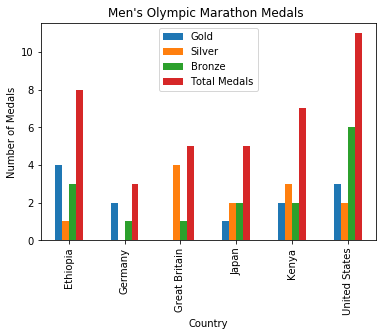

In [20]:
# colors = 
medals_per_country.plot.bar()
plt.legend(loc="best")
plt.title("Men's Olympic Marathon Medals ")
plt.xlabel("Country")
plt.ylabel("Number of Medals")

In [21]:
olympic_team_women = olympic_medalists_women.set_index('Team').sort_index(ascending=True)

gold_medals2 = olympic_team_women[(olympic_team_women['Medal'] == 'Gold')]
silver_medals2 = olympic_team_women[(olympic_team_women['Medal'] == 'Silver')]
bronze_medals2 = olympic_team_women[(olympic_team_women['Medal'] == 'Bronze')]

gold_medals_country2 = gold_medals2.groupby(['Team']).count()['Medal']
silver_medals_country2 = silver_medals2.groupby(['Team']).count()['Medal']
bronze_medals_country2 = bronze_medals2.groupby(['Team']).count()['Medal']

total_medals_country2 = olympic_medalists_women.groupby(['Team']).count()['Medal']

medals_per_country2 = pd.DataFrame({"Gold":gold_medals_country2,
                                "Silver":silver_medals_country2,
                                "Bronze":bronze_medals_country2,
                                "Total Medals":total_medals_country2
                               })
medals_per_country2

,Gold,Silver,Bronze,Total Medals
Ethiopia,2.0,NaN,1,3
Germany,NaN,NaN,1,1
Japan,2.0,1.0,1,4
Kenya,1.0,3.0,1,5
United States,1.0,NaN,1,2


Text(0, 0.5, 'Number of Medals')

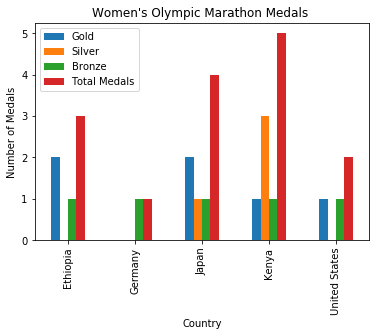

In [22]:
medals_per_country2.plot.bar()
plt.legend(loc="best")
plt.title("Women's Olympic Marathon Medals ")
plt.xlabel("Country")
plt.ylabel("Number of Medals")

Text(0, 0.5, 'Number of Medals')

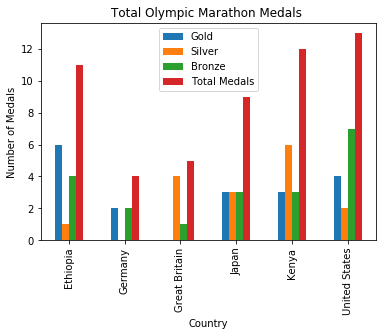

In [23]:
# recombine for total medal count
total_medals = pd.concat([olympic_medalists_men, olympic_medalists_women])
total_medals = total_medals.set_index('Team').sort_index(ascending=True)
total_medals.to_csv("total_medals_per_team.csv")

gold = total_medals[(total_medals['Medal'] == 'Gold')]
silver = total_medals[(total_medals['Medal'] == 'Silver')]
bronze = total_medals[(total_medals['Medal'] == 'Bronze')]

total_gold = gold.groupby(['Team']).count()['Medal']
total_silver = silver.groupby(['Team']).count()['Medal']
total_bronze = bronze.groupby(['Team']).count()['Medal']

total_overall = total_medals.groupby(['Team']).count()['Medal']

total_medals_per_team = pd.DataFrame({"Gold":total_gold,
                                "Silver":total_silver,
                                "Bronze":total_bronze,
                                "Total Medals":total_overall
                                })

total_medals_per_team.plot.bar()
plt.legend(loc="best")
plt.title("Total Olympic Marathon Medals ")
plt.xlabel("Country")
plt.ylabel("Number of Medals")

In [24]:
medals_per_year = pd.concat([olympic_medalists_men, olympic_medalists_women])
chronological_medals = medals_per_year.pivot(columns='Year', values='Team')
team_medals = medals_per_year.pivot(columns='Team', values='Year')
years = chronological_medals.keys()

medals_per_team = medals_per_year.groupby(['Team']).count()['Medal']
medals_per_team

Team
Ethiopia         11
Germany           4
Great Britain     5
Japan             9
Kenya            12
United States    13
Name: Medal, dtype: int64

In [25]:
# merge all major marathon data

# load all women's data
berlin_women_load = 'Female_Elite_Berlin.csv'
boston_women_load = 'Female_Elite_Boston.csv'
chicago_women_load = 'Female_Elite_Chicago.csv'
london_women_load = 'Female_Elite_London.csv'
new_york_women_load = 'Female_Elite_New_York.csv'
tokyo_women_load = 'Female_Elite_Tokyo.csv'

# read files
berlin_women = pd.read_csv(berlin_women_load, encoding='unicode_escape')
berlin_women = berlin_women.assign(Marathon='Berlin')
berlin_women_df = berlin_women

boston_women = pd.read_csv(boston_women_load)
boston_women = boston_women.assign(Marathon='Boston')
boston_women = boston_women[['Year','Athlete','Country/State','Time','Marathon']]
boston_women = boston_women.rename(columns={'Country/State':'Country'})
boston_women_sorted = boston_women.sort_values('Year', ascending=False)

chicago_women = pd.read_csv(chicago_women_load)
chicago_women = chicago_women.assign(Marathon='Chicago')
chicago_women_sorted = chicago_women.sort_values('Year', ascending=False)

london_women = pd.read_csv(london_women_load, encoding='unicode_escape')
london_women = london_women.assign(Marathon='London')
london_women = london_women[['Year','Athlete', 'Nationality','Time(h:m:s)','Marathon']]
london_women = london_women.rename(columns={'Nationality':'Country','Time(h:m:s)':'Time'})
london_women_sorted = london_women.sort_values('Year', ascending=False)

new_york_women = pd.read_csv(new_york_women_load)
new_york_women = new_york_women.assign(Marathon='New York')
new_york_women = new_york_women[['Year','Winner','Country','Time','Marathon']]
new_york_women = new_york_women.rename(columns={'Winner':'Athlete'})
new_york_women_sorted = new_york_women.sort_values('Year', ascending=False)

tokyo_women = pd.read_csv(tokyo_women_load)
tokyo_women = tokyo_women.assign(Marathon='Tokyo')


# merge files to single data frame
mmdw = pd.concat([boston_women_sorted,new_york_women_sorted,chicago_women_sorted,berlin_women_df,london_women_sorted,tokyo_women])

# export to CSV
mmdw.to_csv('major_marathon_women.csv')
mmdw.head()

,Year,Athlete,Country,Time,Marathon
53,2018,Desi Linden,United States,02:39:54,Boston
52,2017,Edna Kiplagat,Kenya,02:21:52,Boston
51,2016,Atsede Baysa,Ethiopia,02:29:19,Boston
50,2015,Caroline Rotich,Kenya,02:24:55,Boston
49,2014,Buzunesh Deba,Ethiopia,02:19:59,Boston


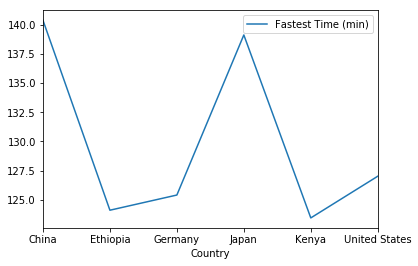

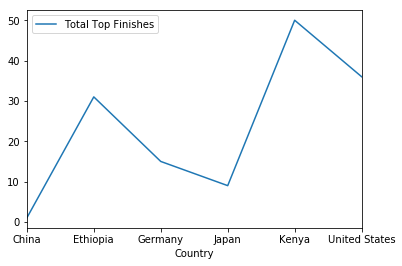

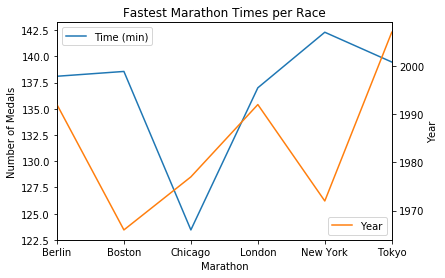

In [235]:
filtered_mmdw = mmdw.loc[mmdw['Country'].isin(['Ethiopia','Germany', 'Great Britain', 'Japan', 
                                                'Kenya','China','United States'])]
total_races = filtered_mmdw.groupby(['Country']).count()
grouped_year = filtered_mmdw.sort_values('Year', ascending=True)

ethiopia = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Ethiopia'])].sort_values('Time', ascending=True).min()
china = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['China'])].sort_values('Time', ascending=True).min()
germany = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Germany'])].sort_values('Time', ascending=True).min()
# gb = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Great Britain'])].sort_values('Time', ascending=True)
japan = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Japan'])].sort_values('Time', ascending=True).min()
kenya = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['Kenya'])].sort_values('Time', ascending=True).min()
usa = filtered_mmdw.loc[filtered_mmdw['Country'].isin(['United States'])].sort_values('Time', ascending=True).min()

fastest_times_per_country = pd.DataFrame({"Country" : ['China','Ethiopia','Germany','Japan','Kenya','United States'],
                              "Fastest Time (min)" : [140.38,124.11,125.41,139.12,123.45,127.02],
                              "Marathon" : ['London','Berlin','Berlin','Berlin','Berlin','Boston'],
                              "Total Top Finishes" : [1,31,15,9,50,36]
                             })
fastest_times_per_country
fastest_times_per_country.plot(x ="Country", y="Fastest Time (min)")
fastest_times_per_country.plot(x ="Country", y="Total Top Finishes")
fastest_times_per_marathon = pd.DataFrame({"Marathon":["Berlin","Boston","Chicago","London","New York","Tokyo"],
                                          "Time (min)":[138.11,138.57,123.45,137.01,142.31,139.47],
                                          "Country":["Ethiopia","Ethiopia","Ethiopia","China","Ethiopia","Ethiopia"],
                                          "Year":[1992,1966,1977,1992,1972,2007]
                                          })

fastest_times_per_marathon.plot(x="Marathon", y="Time (min)", label="Time (min)")
plt.ylabel("Number of Medals")

ax2 =fastest_times_per_marathon["Year"].plot(secondary_y=True, label="Year")
ax2.set_ylabel("Year")
ax2.legend(loc="lower right")

plt.title("Fastest Marathon Times per Race")

plt.show()

In [61]:
# load all men's data
berlin_men_load = 'Male_Elite_Berlin.csv'
boston_men_load = 'Male_Elite_Boston.csv'
chicago_men_load = 'Male_Elite_Chicago.csv'
london_men_load = 'Male_Elite_London.csv'
new_york_men_load = 'Male_Elite_New_York.csv'
tokyo_men_load = 'Male_Elite_Tokyo.csv'

# read files
berlin_men = pd.read_csv(berlin_men_load, encoding='unicode_escape')
berlin_men = berlin_men.assign(Marathon='Berlin')


boston_men = pd.read_csv(boston_men_load)
boston_men = boston_men.assign(Marathon='Boston')
boston_men = boston_men[['Year','Athlete','Country/State or Province','Time','Marathon']]
boston_men = boston_men.rename(columns={'Country/State or Province':'Country'})
boston_men_sorted = boston_men.sort_values('Year', ascending=False)

chicago_men = pd.read_csv(chicago_men_load, encoding='unicode_escape')
chicago_men = chicago_men.assign(Marathon='Chicago')
chicago_men_sorted = chicago_men.sort_values('Year', ascending=False)

london_men = pd.read_csv(london_men_load, encoding='unicode_escape')
london_men = london_men.assign(Marathon='London')
london_men = london_men[['Year','Athlete', 'Nationality','Time(h:m:s)','Marathon']]
london_men = london_men.rename(columns={'Nationality':'Country','Time(h:m:s)':'Time'})
london_men_sorted = london_men.sort_values('Year', ascending=False)

new_york_men = pd.read_csv(new_york_men_load, encoding='unicode_escape')
new_york_men = new_york_men.assign(Marathon='New York')
new_york_men = new_york_men[['Year','Winner','Country','Time','Marathon']]
new_york_men = new_york_men.rename(columns={'Winner':'Athlete'})
new_york_men_sorted = new_york_men.sort_values('Year', ascending=False)

tokyo_men = pd.read_csv(tokyo_men_load, encoding='unicode_escape')
tokyo_men = tokyo_men.assign(Marathon='Tokyo')

# merge files to single data frame
mmdm = pd.concat([boston_men_sorted,new_york_men_sorted,chicago_men_sorted,berlin_men,london_men_sorted,tokyo_men])

# export to CSV
mmdm.to_csv('major_marathon_men.csv')
mmdm.head()

,Year,Athlete,Country,Time,Marathon
121,2018,Yuki Kawauchi,Japan,02:15:58,Boston
120,2017,Geoffrey Kirui,Kenya,02:09:37,Boston
119,2016,Berhanu Hayle,Ethiopia,02:12:45,Boston
118,2015,Desisa Benti,Ethiopia,02:09:17,Boston
117,2014,Meb Keflezighi,United States,02:08:37,Boston


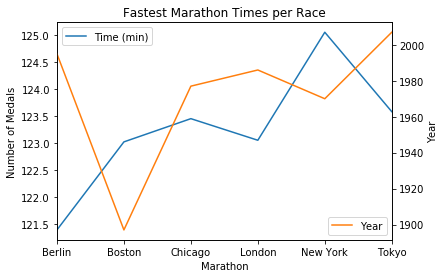

In [194]:
filtered_mmdm = mmdm.loc[mmdm['Country'].isin(['Ethiopia','Germany', 'Great Britain', 'Japan', 
                                                'Kenya','United States'])]
total_races2 = filtered_mmdm.groupby(['Marathon'])
grouped_year2 = filtered_mmdm.sort_values('Time', ascending=True)

ethiopia_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Ethiopia'])].sort_values('Time', ascending=True).min()
germany_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Germany'])].sort_values('Time', ascending=True).min()
# gb_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Great Britain'])].sort_values('Time', ascending=True)
japan_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Japan'])].sort_values('Time', ascending=True).min()
kenya_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['Kenya'])].sort_values('Time', ascending=True).min()
usa_men = filtered_mmdm.loc[filtered_mmdm['Country'].isin(['United States'])].sort_values('Time', ascending=True).min()

mens_times_per_country = pd.DataFrame({"Country" : ['Ethiopia','Germany','Japan','Kenya','United States'],
                              "Fastest Time (min)" : [123.03,153.36,128.27,121.39,125.38],
                              "Marathon" : ['Berlin','Boston','Boston','Berlin','Boston'],
                              "Total Top Finishes" : [20,1,13,89,68]
                             })

# mens_times.plot(x ="Country", y="Fastest Time (min)")
# mens_times.plot(x ="Country", y="Total Top Finishes")
mens_times_per_marathon = pd.DataFrame({"Marathon":["Berlin","Boston","Chicago","London","New York","Tokyo"],
                                          "Time (min)":[121.39,123.02,123.45,123.05,125.05,123.58],
                                          "Country":["Ethiopia","Ethiopia","Ethiopia","Ethiopia","Ethiopia","Ethiopia"],
                                          "Year":[1995,1897,1977,1986,1970,2007]
                                          })

mens_times_per_marathon.plot(x="Marathon", y="Time (min)", label="Time (min)")
plt.ylabel("Number of Medals")

m_ax2 = mens_times_per_marathon["Year"].plot(secondary_y=True, label="Year")
m_ax2.set_ylabel("Year")
m_ax2.legend(loc="lower right")

plt.title("Fastest Marathon Times per Race")

plt.show()
